# Install Libraries

In [2]:
!pip install folium
!pip install geopandas

  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.1 MB/s eta 0:00:00ta 0:00:01
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
  Using cached geopandas-0.14.4-py3-none-any.whl.metadata (1.5 kB)
  Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl.metadata (50 kB)
  Using cached pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached shapely-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
Using cached geopandas-0.14.4-py3-none-any.whl (1.1 MB)
Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl (15.7 MB)
Using cached pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached shapely-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_6

### Preprocessing

In [3]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read in the data 
df = pd.read_csv("../Data/House_price_multifeatures.csv",low_memory=False) # low memeory where since there are some columns with undefined dtypes
df 

,Unnamed: 0,Id,PropertyLocationStreet1,PropertyLocationStreet2,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerMailAddress2,...,HydrantLatitude,HydrantLongitude,LastSalePrice,LastSaleDate,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,Geometry,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,19-201,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,NaN,...,NaN,NaN,NaN,NaN,False,2017-05-12 00:00:00,C21-000-188-9852-8,2015.0,NaN,541-0
1,0,12086db272d757be6,5934 NW 7 PL,NaN,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,NaN,...,25.83045,-80.21022,NaN,NaN,True,2017-12-08 00:00:00,C23-000-198-3578-4,2015.0,NaN,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,NaN,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,NaN,...,27.94326,-82.39026,NaN,NaN,True,2031-01-01 00:00:00,C39-000-406-3313-3,2015.0,NaN,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,NaN,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,NaN,...,28.07439,-82.47757,NaN,NaN,True,2018-04-04 00:00:00,C39-000-389-2623-4,2015.0,NaN,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,NaN,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,NaN,...,27.87574,-82.29307,NaN,NaN,True,2031-01-01 00:00:00,C39-000-414-6909-9,2015.0,NaN,080-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81742,0,1200980de660f371c,1199 HOUSTON ST,NaN,MELBOURNE,9.0,32935,"HELLER, ARDYTH",1199 HOUSTON ST,NaN,...,NaN,NaN,NaN,NaN,True,2031-01-01 00:00:00,C15-001-090-5145-8,2015.0,NaN,064-0
81743,0,1200980de660f371c,1199 HOUSTON ST,NaN,MELBOURNE,9.0,32935,"HELLER, ARDYTH",1199 HOUSTON ST,NaN,...,NaN,NaN,NaN,NaN,True,2031-01-01 00:00:00,C15-001-090-5145-8,2015.0,NaN,064-0
81744,0,1208698914968668a,3715 HARLANO ST,NaN,CORAL GABLES,86.0,33134,MARITZA NAVARRO,3715 HARLANO ST,NaN,...,25.73712,-80.26428,735000.0,09/2016,True,2017-12-08 00:00:00,C23-000-211-7828-0,2015.0,NaN,034-0
81745,0,120117d9876b67325,714 N 32 AVE,NaN,HOLLYWOOD,11.0,33021,"CONNOLLY,MEAGHAN N",714 N 32 AVE,NaN,...,NaN,NaN,NaN,NaN,True,2017-06-20 00:00:00,C16-000-116-3292-4,2015.0,NaN,035-0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                81747 non-null  int64  
 1   Id                        81747 non-null  object 
 2   PropertyLocationStreet1   81747 non-null  object 
 3   PropertyLocationStreet2   3528 non-null   object 
 4   PropertyCity              81744 non-null  object 
 5   CountyFIPS                81739 non-null  float64
 6   PropertyZip               81747 non-null  int64  
 7   OwnerName                 81743 non-null  object 
 8   OwnerMailAddress1         81425 non-null  object 
 9   OwnerMailAddress2         3235 non-null   object 
 10  OwnerCity                 81435 non-null  object 
 11  OwnerState                81534 non-null  object 
 12  OwnerZip                  78231 non-null  object 
 13  CitizensTerritory         81671 non-null  float64
 14  Constr

In [6]:
df.describe()

,Unnamed: 0,CountyFIPS,PropertyZip,CitizensTerritory,NumberOfStories,NumberOfFamilies,YearBuilt,YearofRoof,AdjSquareFeet,Occupancy,...,SinkholeLongitude,SinkholeId,FloodZoneRiskLevel,EffectiveYearBuilt,NumberOfBusiness,HydrantLatitude,HydrantLongitude,LastSalePrice,AssesmentYear,Geometry
count,81747.0,81739.000000,81747.000000,81671.000000,32836.000000,1.0,81692.000000,6419.000000,81643.000000,0.0,...,81506.000000,81472.000000,0.0,81626.000000,5779.000000,36146.000000,36146.000000,1.182000e+04,81702.000000,0.0
mean,0.0,65.003976,33390.734816,175.467669,1.093662,1.0,1974.423346,2006.771148,1936.953811,NaN,...,-81.128713,2972.684493,NaN,1983.318232,1.191556,27.127115,-81.069140,2.107546e+05,2014.999755,NaN
std,0.0,40.804727,602.108660,237.905334,0.321324,NaN,17.044327,6.132341,854.067386,NaN,...,1.182114,1211.940134,NaN,14.833168,0.548914,1.250596,1.320678,3.827658e+05,0.067477,NaN
min,0.0,1.000000,32003.000000,5.000000,1.000000,1.0,1820.000000,1899.000000,1.000000,NaN,...,-86.645270,1.000000,NaN,1901.000000,1.000000,25.411190,-86.398640,1.000000e+02,2013.000000,NaN
25%,0.0,11.000000,33027.000000,37.000000,1.000000,1.0,1961.000000,2003.000000,1373.000000,NaN,...,-81.865260,1892.000000,NaN,1975.000000,1.000000,25.944040,-82.107065,7.300000e+04,2015.000000,NaN
50%,0.0,86.000000,33314.000000,46.000000,1.000000,1.0,1976.000000,2006.000000,1760.000000,NaN,...,-80.646440,2910.000000,NaN,1985.000000,1.000000,26.838490,-80.397360,1.600000e+05,2015.000000,NaN
75%,0.0,99.000000,33755.000000,90.000000,1.000000,1.0,1988.000000,2012.000000,2262.000000,NaN,...,-80.183290,4193.000000,NaN,1994.000000,1.000000,28.003448,-80.202290,2.650000e+05,2015.000000,NaN
max,0.0,131.000000,34997.000000,993.000000,6.000000,1.0,2018.000000,2019.000000,19998.000000,NaN,...,-80.058360,12797.000000,NaN,2018.000000,9.000000,30.797100,29.164440,1.737504e+07,2018.000000,NaN


In [7]:
df.isnull().sum()

Unnamed: 0                      0
Id                              0
PropertyLocationStreet1         0
PropertyLocationStreet2     78219
PropertyCity                    3
                            ...  
FloodzoneLastUpdatedDate       53
StateParcelId                 185
AssesmentYear                  45
Geometry                    81747
TTTerritory                   109
Length: 96, dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity', 'CountyFIPS', 'PropertyZip',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'Roof

# Exploratory Data Analysis

### Missing Value Analysis

                      Column  Number of Missing Values  Percentage
0                  Occupancy                     81747  100.000000
1   NumberOfMonthsUnoccupied                     81747  100.000000
2        CentralStationAlarm                     81747  100.000000
3        AutomaticSprinklers                     81747  100.000000
4             NumberOfClaims                     81747  100.000000
5            DesignWindSpeed                     81747  100.000000
6     InternalPressureDesign                     81747  100.000000
7         RoofDeckAttachment                     81747  100.000000
8                  RoofCover                     81747  100.000000
9       RooftoWallconnection                     81747  100.000000
10  SecondaryWaterResistance                     81747  100.000000
11         OpeningProtection                     81747  100.000000
12          NoPriorInsurance                     81747  100.000000
13                 Condemned                     81747  100.00

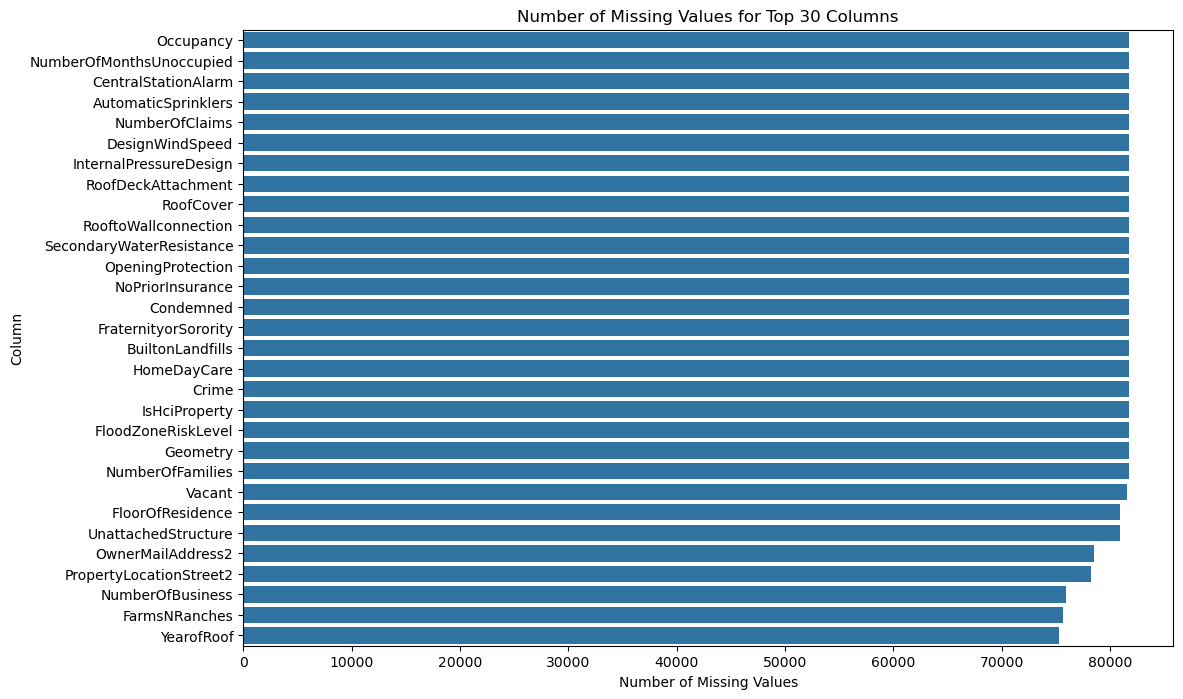

In [9]:

# Initialize an empty list to store the results
missing_values = []

# Iterate over all the columns in the dataset
for column in df.columns:
    num_missing = df[column].isnull().sum()
    if num_missing > 0:  # Consider only columns with missing values
        missing_values.append((column, num_missing))

# Sort the list of results in descending order of the number of missing values
missing_values.sort(key=lambda x: x[1], reverse=True)

# Create a dataframe for the 30 columns with the highest number of missing values
missing_values_df = pd.DataFrame(missing_values[:30], columns=['Column', 'Number of Missing Values'])
missing_values_df['Percentage'] = (missing_values_df['Number of Missing Values'] / len(df)) * 100

# Print the percentage of missing values
print(missing_values_df)

# Create a bar plot of the number of missing values for the 30 columns with the highest number of missing values
plt.figure(figsize=(12, 8))
sns.barplot(data=missing_values_df, x='Number of Missing Values', y='Column')
plt.title('Number of Missing Values for Top 30 Columns')
plt.show()


### Outliers Analysis

                      Column  Number of Outliers  Percentage
0          CitizensTerritory               19528   23.888338
1            DistancetoCoast               16876   20.644183
2         DistancetoSinkhole                8753   10.707427
3                 ParcelSize                6452    7.892644
4                ValueofHome                5753    7.037567
5              AdjSquareFeet                3630    4.440530
6            NumberOfStories                2797    3.421532
7          NumberOfBuildings                2680    3.278408
8   DistancetoFireDepartment                2575    3.149963
9          DistancetoHydrant                2250    2.752395
10             NumberOfUnits                2048    2.505291
11               PropertyZip                1715    2.097936
12         SinkholeLongitude                1421    1.738290
13      FireStationLongitude                1402    1.715048
14         CentroidLongitude                1399    1.711378
15            CoastLongi

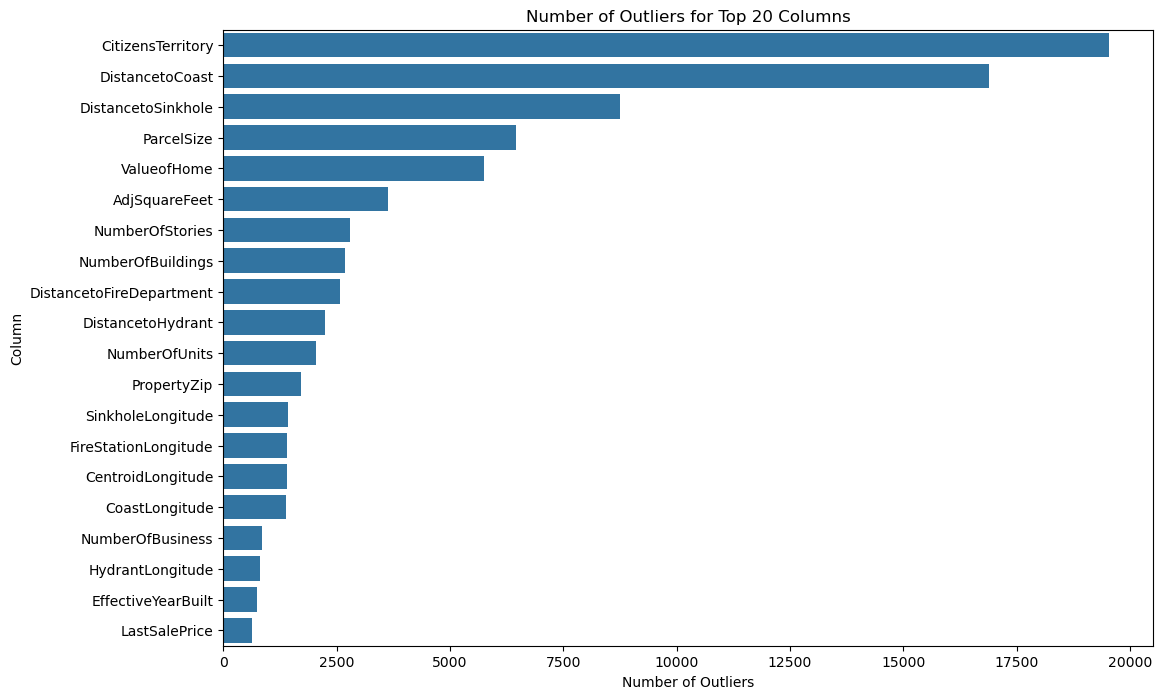

In [10]:
# Initialize an empty list to store the results
outliers = []

# Iterate over only numeric columns in the dataset
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    num_outliers = df[outlier_condition].shape[0]
    if num_outliers > 0:  # Consider only columns with outliers
        outliers.append((column, num_outliers))

# Sort the list of results in descending order of the number of outliers
outliers.sort(key=lambda x: x[1], reverse=True)

# Create a dataframe for the 20 columns with the highest number of outliers
outliers_df = pd.DataFrame(outliers[:20], columns=['Column', 'Number of Outliers'])
outliers_df['Percentage'] = (outliers_df['Number of Outliers'] / len(df)) * 100

# Print the percentage of outliers
print(outliers_df)

# Create a bar plot of the number of outliers for the 20 columns with the highest number of outliers
plt.figure(figsize=(12, 8))
sns.barplot(data=outliers_df, x='Number of Outliers', y='Column')
plt.title('Number of Outliers for Top 20 Columns')
plt.show()


### Distribution of Numerical Features

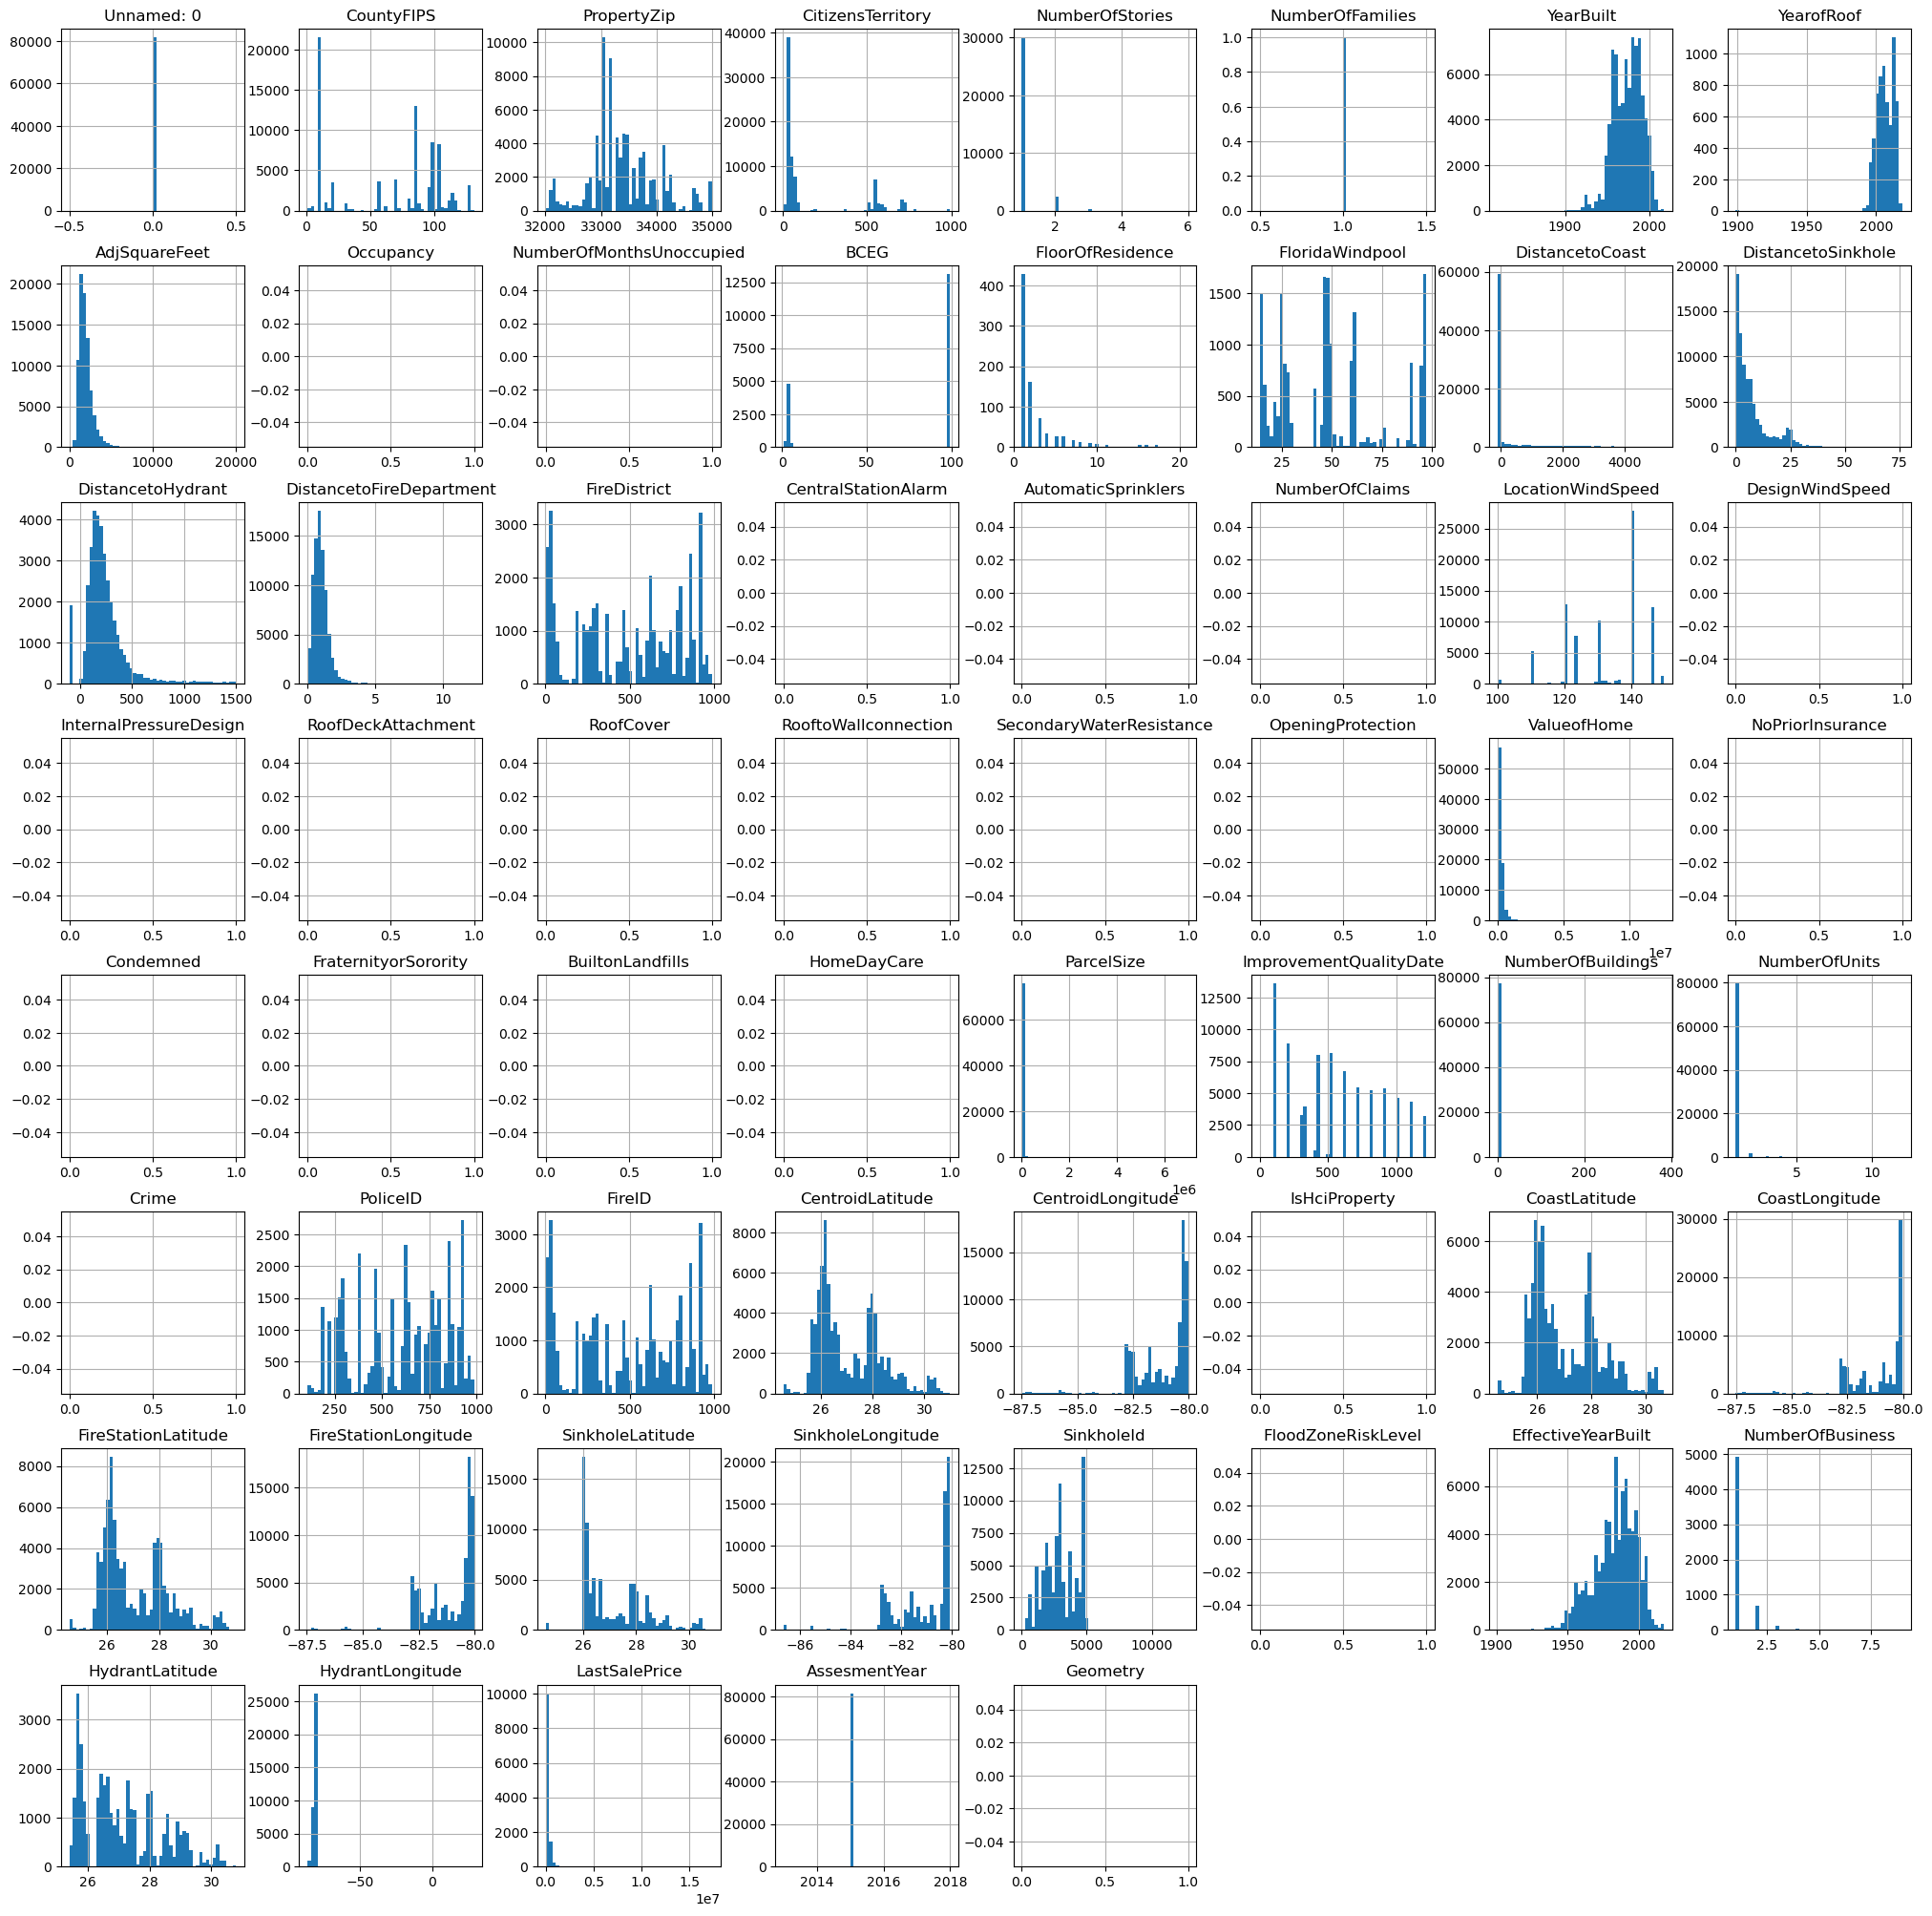

In [11]:
# Histograms for features
df.hist(bins=50, figsize=(25,25))
plt.show()


<Axes: xlabel='ConstructionType', ylabel='count'>

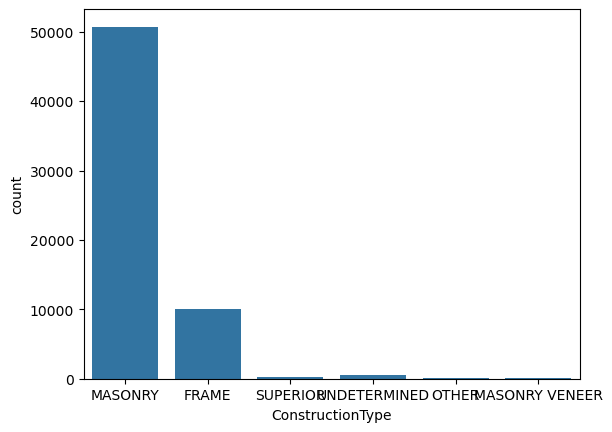

In [12]:
# bar chart
sns.countplot(data=df, x="ConstructionType")

### Bivariate Analysis

<Axes: xlabel='YearBuilt', ylabel='ValueofHome'>

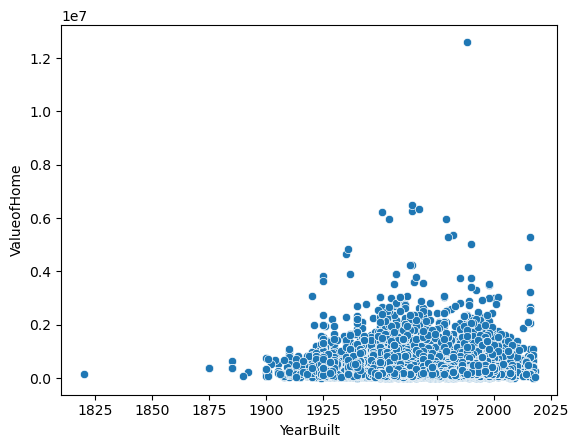

In [13]:
# Scatter plot 
sns.scatterplot(data=df, x='YearBuilt', y='ValueofHome')


<Axes: xlabel='ValueofHome', ylabel='TypeOfResidence'>

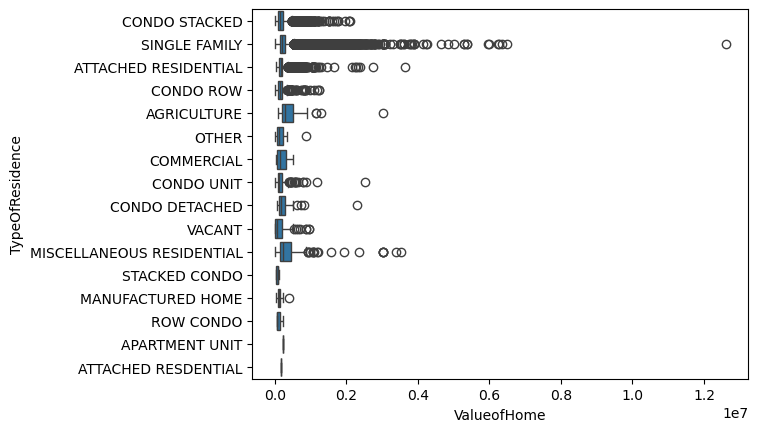

In [14]:
#Box plot
sns.boxplot(data=df, x='ValueofHome', y='TypeOfResidence')


### Multivariate Analysis

ValueofHome           1.000000
AdjSquareFeet         0.536919
LastSalePrice         0.351393
NumberOfStories       0.218556
ParcelSize            0.066214
NumberOfUnits         0.052812
DistancetoCoast       0.034565
YearBuilt             0.018746
NumberOfClaims             NaN
DesignWindSpeed            NaN
FloodZoneRiskLevel         NaN
NumberOfFamilies           NaN
Name: ValueofHome, dtype: float64


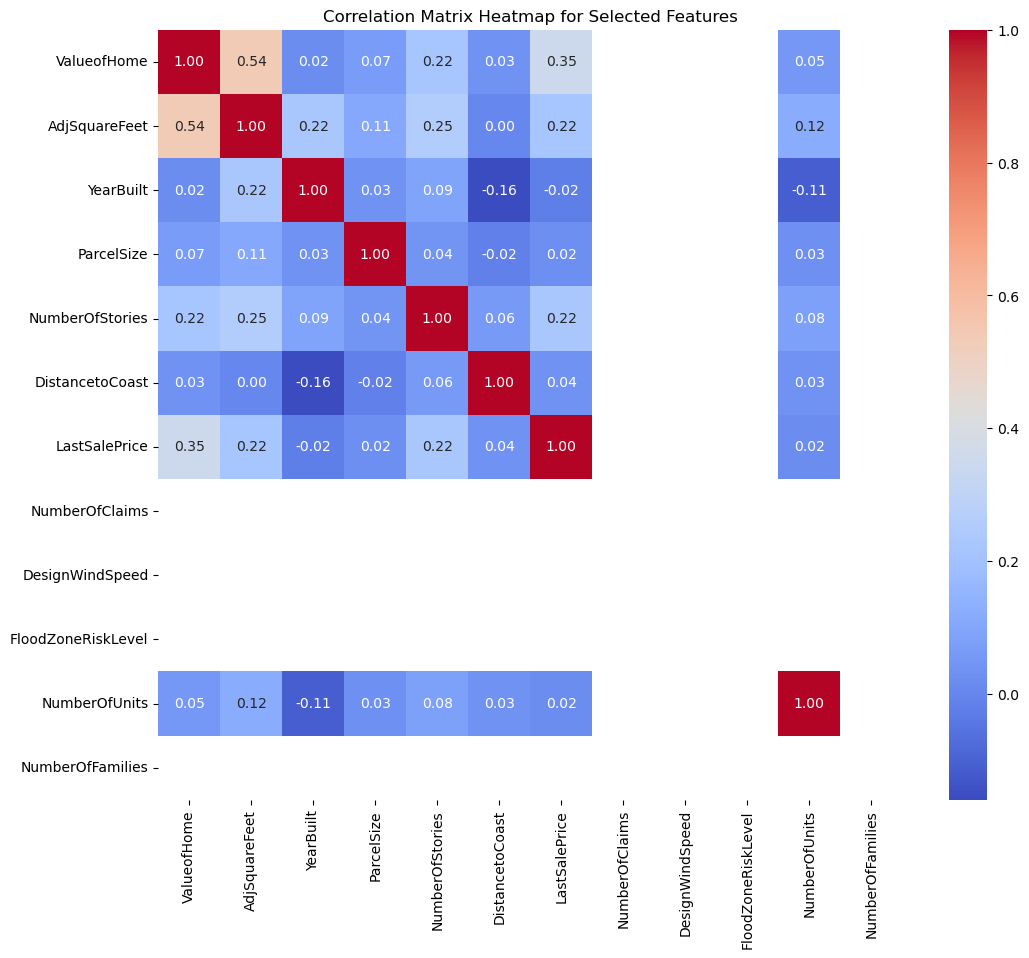

In [15]:
# List of selected columns to include in the correlation analysis
selected_columns = [
    'ValueofHome', 'AdjSquareFeet', 'YearBuilt', 'ParcelSize', 'NumberOfStories', 
    'DistancetoCoast', 'LastSalePrice', 'NumberOfClaims', 'DesignWindSpeed', 
    'FloodZoneRiskLevel', 'NumberOfUnits', 'NumberOfFamilies'
]

# Ensure all selected columns are in the dataframe
selected_columns = [col for col in selected_columns if col in df.columns]

# Select only the selected numerical columns
numerical_df = df[selected_columns]

# Compute the correlation matrix for the selected columns
corr_matrix = numerical_df.corr()

# Print the correlation matrix sorted for the 'ValueofHome' column
if 'ValueofHome' in corr_matrix:
    print(corr_matrix['ValueofHome'].sort_values(ascending=False))

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # size of plot
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Selected Features')
plt.show()


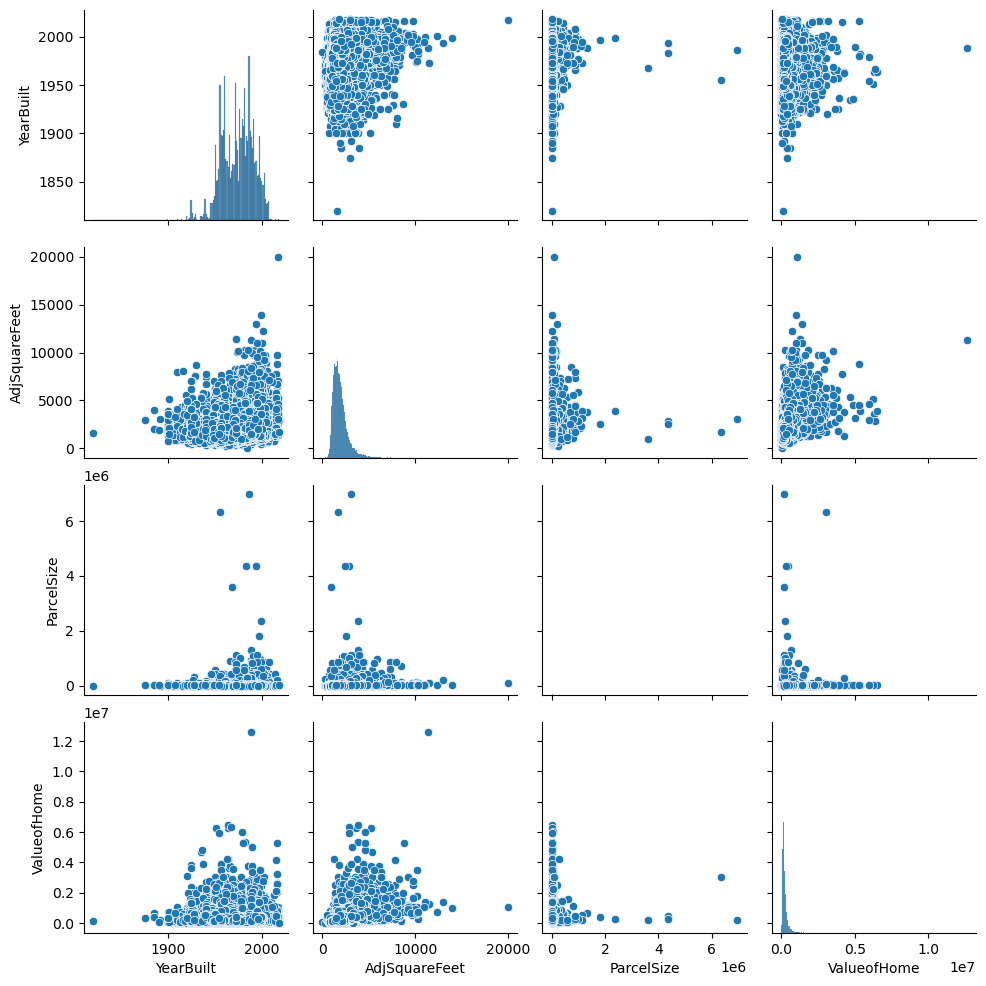

In [16]:
#Pair plot 
sns.pairplot(data=df, vars=['YearBuilt', 'AdjSquareFeet', 'ParcelSize', 'ValueofHome'])


### Geospatial Analysis


In [17]:
import folium

# Create a map centered at the mean latitude and longitude of the dataset
map = folium.Map(location=[df['CentroidLatitude'].mean(), df['CentroidLongitude'].mean()])

# Display the map
map


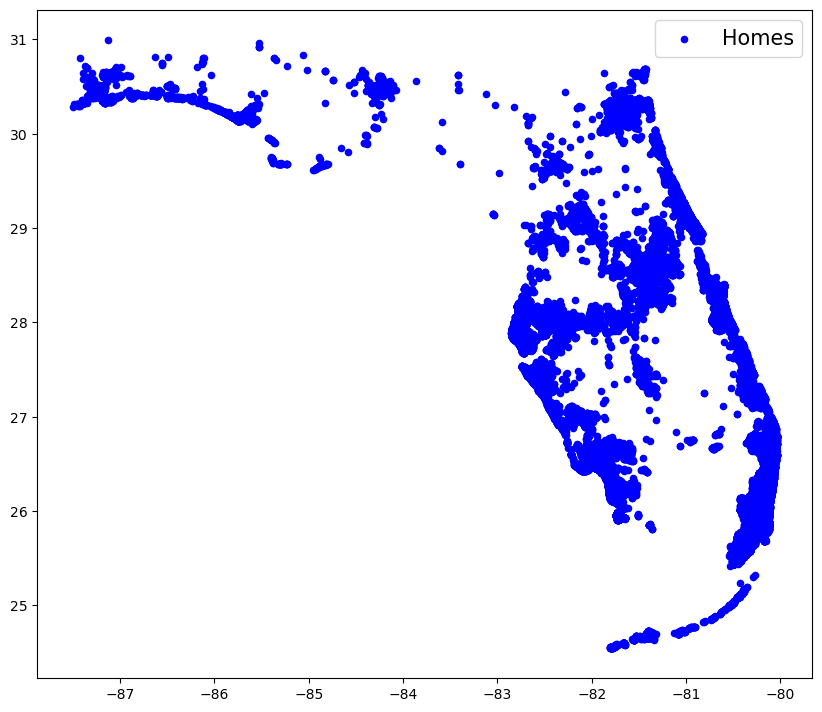

In [18]:
import geopandas as gpd
from shapely.geometry import Point

# Creating a GeoDataFrame for latitude and longitude
geometry = [Point(xy) for xy in zip(df['CentroidLongitude'], df['CentroidLatitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10,10))
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Homes')
plt.legend(prop={'size': 15})


### Temporal Analysis

<Axes: xlabel='YearBuilt', ylabel='ValueofHome'>

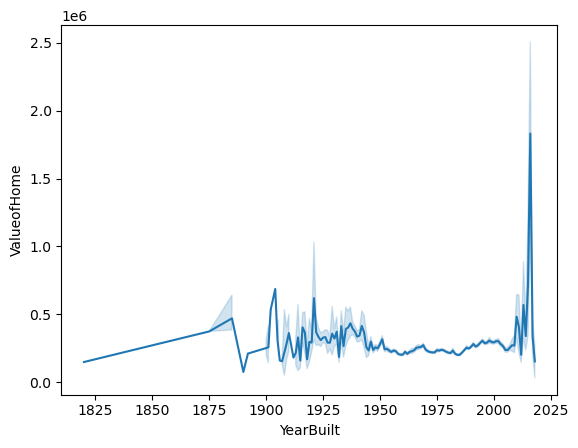

In [19]:
#Line plot
sns.lineplot(data=df, x='YearBuilt', y='ValueofHome')


/tmp/ipykernel_20/4118240877.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])


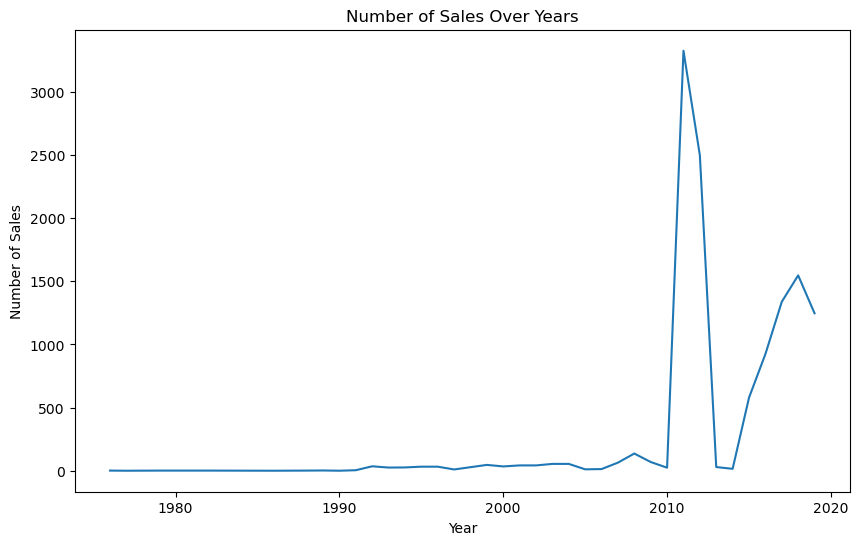

In [20]:
# Convert dates to datetime format
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])

# Time series plot
plt.figure(figsize=(10,6))
df.groupby(df['LastSaleDate'].dt.year)['LastSaleDate'].count().plot(kind='line')
plt.title('Number of Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()


# Feature Engineering

In [21]:
# Initialize an empty list to store the results
missing_values = []

# Iterate over all the columns in the dataset
for column in df.columns:
    num_missing = df[column].isnull().sum()
    percentage_missing = (num_missing / len(df)) * 100
    if percentage_missing > 40:  # Consider only columns with more than 40% missing values
        missing_values.append((column, num_missing, percentage_missing))

# Sort the list of results in descending order of the percentage of missing values
missing_values.sort(key=lambda x: x[2], reverse=True)

# Create a dataframe for the columns with more than 50% missing values
missing_values_df = pd.DataFrame(missing_values, columns=['Column', 'Number of Missing Values', 'Percentage'])

# Print the number of missing values and the percentage of missing values
print("Columns with more than 40% missing values:")
print(missing_values_df)


Columns with more than 40% missing values:
                      Column  Number of Missing Values  Percentage
0                  Occupancy                     81747  100.000000
1   NumberOfMonthsUnoccupied                     81747  100.000000
2        CentralStationAlarm                     81747  100.000000
3        AutomaticSprinklers                     81747  100.000000
4             NumberOfClaims                     81747  100.000000
5            DesignWindSpeed                     81747  100.000000
6     InternalPressureDesign                     81747  100.000000
7         RoofDeckAttachment                     81747  100.000000
8                  RoofCover                     81747  100.000000
9       RooftoWallconnection                     81747  100.000000
10  SecondaryWaterResistance                     81747  100.000000
11         OpeningProtection                     81747  100.000000
12          NoPriorInsurance                     81747  100.000000
13                 

In [22]:
df.shape

(81747, 96)

### Creating new dataframe and removing columns that have more than 40% percent missing values

In [23]:
# Get the list of columns to drop (those with more than 40% missing values)
columns_to_drop = missing_values_df['Column'].tolist()

# Drop these columns from the original DataFrame
new_df = df.drop(columns=columns_to_drop)

# Print the shape of the new DataFrame to confirm the columns have been dropped
print("Shape of the original DataFrame:", df.shape)
print("Shape of the new DataFrame after dropping columns:", new_df.shape)

# Display the first few rows of the new DataFrame
new_df.head()


Shape of the original DataFrame: (81747, 96)
Shape of the new DataFrame after dropping columns: (81747, 50)


,Unnamed: 0,Id,PropertyLocationStreet1,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerCity,OwnerState,...,SinkholeLatitude,SinkholeLongitude,SinkholeId,SinkholeAddress,EffectiveYearBuilt,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,MAUMEE,OH,...,NaN,NaN,NaN,NaN,1988.0,False,2017-05-12 00:00:00,C21-000-188-9852-8,2015.0,541-0
1,0,12086db272d757be6,5934 NW 7 PL,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,MIAMI,FL,...,25.96256,-80.16641,2783.0,NaN,2004.0,True,2017-12-08 00:00:00,C23-000-198-3578-4,2015.0,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,TAMPA,FL,...,27.94389,-82.37694,468.0,"BRANDON Z-33 505 PAPAYA DRIVE TAMPA, FL 33619",2010.0,True,2031-01-01 00:00:00,C39-000-406-3313-3,2015.0,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,TAMPA,FL,...,28.08028,-82.47806,323.0,"SULPHUR SPRINGS Y-32, FL",2006.0,True,2018-04-04 00:00:00,C39-000-389-2623-4,2015.0,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,RIVERVIEW,FL,...,27.89053,-82.29201,1920.0,"610 HITCHING POST DR BRANDON, FL, 33511",2002.0,True,2031-01-01 00:00:00,C39-000-414-6909-9,2015.0,080-0


In [24]:
new_df.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1', 'PropertyCity',
       'CountyFIPS', 'PropertyZip', 'OwnerName', 'OwnerMailAddress1',
       'OwnerCity', 'OwnerState', 'OwnerZip', 'CitizensTerritory',
       'ConstructionType', 'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet',
       'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole',
       'DistancetoFireDepartment', 'RespondingFireDepartment',
       'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome',
       'FloodZone', 'ParcelSize', 'ImprovementQuality',
       'ImprovementQualityDate', 'NumberOfBuildings', 'NumberOfUnits',
       'CountyName', 'PropertyState', 'CentroidLatitude', 'CentroidLongitude',
       'CoastLatitude', 'CoastLongitude', 'FireStationLatitude',
       'FireStationLongitude', 'SinkholeLatitude', 'SinkholeLongitude',
       'SinkholeId', 'SinkholeAddress', 'EffectiveYearBuilt', 'Homestead',
       'FloodzoneLastUpdatedDate', 'StateParcelId', 'AssesmentYear',
       'TTT

### Specific Reasons for Dropping Each Column:
    
'Unnamed: 0', 'Id': Often serve as arbitrary indices or identifiers that do not carry meaningful information for analysis.

'OwnerName', 'OwnerMailAddress1': Personal information that is irrelevant to property value analysis and raises privacy issues.

'PropertyLocationStreet1', 'OwnerCity', 'OwnerState', 'OwnerZip', 'PropertyCity', 'PropertyZip': Highly specific location details that are less useful when analyzing property trends across larger geographic areas.

'CitizensTerritory', 'SinkholeId', 'SinkholeAddress', 'StateParcelId': Specific identifiers that are typically irrelevant for broad market analysis or predictive modeling.

'CoastLatitude', 'Coecis'Longitude', 'FireStationLatitude', 'FireStationLongitude', 'SinkholeLatitude', 'SinkholeLongitude': Very detailed geospatial data that may only be necessary for specific environmental or risk-related studies, not general property valuation.

'PropertyState': Redundant if the analysis covers a specific state or if state-level differences are not central to the analysis.

'CentroidLatitude', 'CentroidLongitude': While useful for mapping, they might not be necessary if geographic specificity at this level is not required for the analysis.


In [25]:
        
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0', 'Id', 'OwnerName', 'OwnerMailAddress1', 'PropertyLocationStreet1', 'OwnerCity',
    'OwnerState', 'OwnerZip', 'PropertyCity','CitizensTerritory', 'SinkholeId','SinkholeAddress', 'StateParcelId','CoastLatitude', 'CoastLongitude',
    'FireStationLatitude', 'FireStationLongitude', 'SinkholeLatitude', 
    'SinkholeLongitude','PropertyZip','PropertyState','CentroidLatitude', 'CentroidLongitude'
]

# Drop these columns from the DataFrame
new_df = new_df.drop(columns=columns_to_drop, errors='ignore')  # using errors='ignore' to avoid errors if a column does not exist

# Display the remaining columns to confirm
print("Updated columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated columns: ['CountyFIPS', 'ConstructionType', 'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet', 'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'RespondingFireDepartment', 'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome', 'FloodZone', 'ParcelSize', 'ImprovementQuality', 'ImprovementQualityDate', 'NumberOfBuildings', 'NumberOfUnits', 'CountyName', 'EffectiveYearBuilt', 'Homestead', 'FloodzoneLastUpdatedDate', 'AssesmentYear', 'TTTerritory']
DataFrame shape: (81747, 27)


In [26]:
#Age of the house
from datetime import datetime

new_df['Age'] = datetime.now().year - new_df['YearBuilt']

In [27]:
# Counting numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = new_df.select_dtypes(include=['object']).columns

print("Number of numerical columns:", len(numerical_cols))
print("Number of categorical columns:", len(categorical_cols))


Number of numerical columns: 15
Number of categorical columns: 13


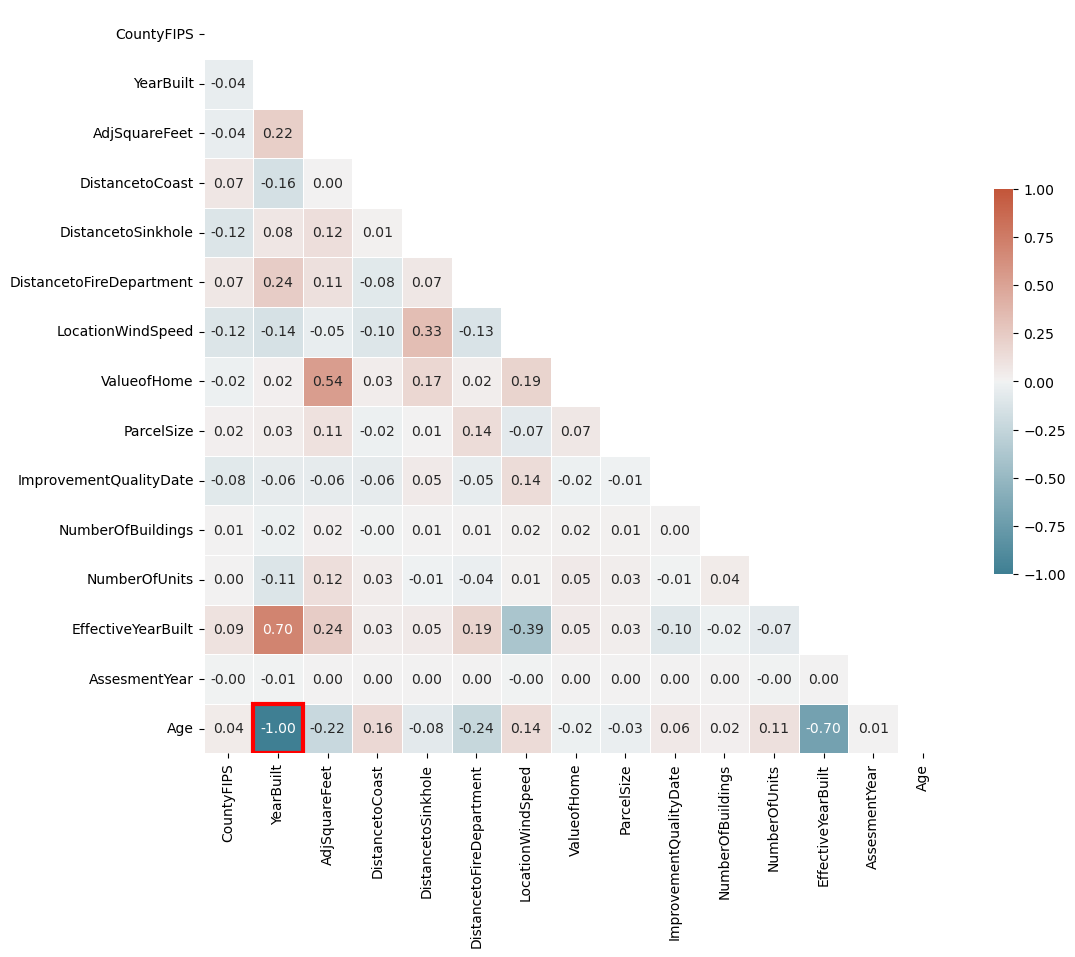

In [28]:
# Calculating correlation matrix among numerical columns of new_df
corr_matrix = new_df[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".2f")

# Highlighting highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.75 or corr_matrix.iloc[i, j] < -0.75:  # strong correlation threshold
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.show()


In [29]:
# Columns related to the years being removed
columns_to_remove = ['CountyFIPS','YearBuilt', 'EffectiveYearBuilt', 'AssesmentYear', 'ImprovementQualityDate']

# Dropping the columns
new_df = new_df.drop(columns=columns_to_remove, errors='ignore')

# Verify the changes
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['ConstructionType', 'YearofRoofVerified', 'AdjSquareFeet', 'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'RespondingFireDepartment', 'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome', 'FloodZone', 'ParcelSize', 'ImprovementQuality', 'NumberOfBuildings', 'NumberOfUnits', 'CountyName', 'Homestead', 'FloodzoneLastUpdatedDate', 'TTTerritory', 'Age']
DataFrame shape: (81747, 23)


In [30]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)
print(len(categorical_cols))


Categorical columns: Index(['ConstructionType', 'YearofRoofVerified', 'PPC', 'TypeOfResidence',
       'RespondingFireDepartment', 'WindborneDebrisRegion', 'Terrain',
       'FloodZone', 'ImprovementQuality', 'CountyName', 'Homestead',
       'FloodzoneLastUpdatedDate', 'TTTerritory'],
      dtype='object')
13


In [31]:
# Analyzing unique values 
for col in categorical_cols:
    unique_values = new_df[col].nunique()
    print(f"{col} has {unique_values} unique values.")


ConstructionType has 6 unique values.
YearofRoofVerified has 2 unique values.
PPC has 20 unique values.
TypeOfResidence has 16 unique values.
RespondingFireDepartment has 1503 unique values.
WindborneDebrisRegion has 2 unique values.
Terrain has 3 unique values.
FloodZone has 172 unique values.
ImprovementQuality has 6 unique values.
CountyName has 61 unique values.
Homestead has 2 unique values.
FloodzoneLastUpdatedDate has 148 unique values.
TTTerritory has 152 unique values.


In [32]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(new_df[col].value_counts().head())



Value counts for ConstructionType:
ConstructionType
MASONRY           50718
FRAME              9995
UNDETERMINED        576
SUPERIOR            256
MASONRY VENEER       78
Name: count, dtype: int64

Value counts for YearofRoofVerified:
YearofRoofVerified
False    78973
True      2666
Name: count, dtype: int64

Value counts for PPC:
PPC
4    16407
3    14428
2    11560
1    11144
5     2623
Name: count, dtype: int64

Value counts for TypeOfResidence:
TypeOfResidence
SINGLE FAMILY           68585
ATTACHED RESIDENTIAL     5413
CONDO STACKED            5368
CONDO ROW                1162
CONDO UNIT                588
Name: count, dtype: int64

Value counts for RespondingFireDepartment:
RespondingFireDepartment
MIRAMAR FIRE DEPARTMENT AND RESCUE STATION 19                          673
MARCO ISLAND FIRE DEPARTMENT AND RESCUE STATION 50                     661
BROWARD COUNTY FIRE DEPARTMENT AND RESCUE STATION 37                   502
MIAMI-DADE COUNTY FIRE DEPARTMENT AND RESCUE STATION 4 (COR

### Explanation for Dropping Specific Categorical Columns:

YearofRoofVerified:
    Limited Impact: Whether the roof's year was verified may not significantly influence the overall property value compared to factors like the roof's condition or age.
    
PPC (Public Protection Classification):
    Niche Relevance: While important for insurance purposes, the PPC might not universally affect property value unless the analysis specifically focuses on insurance premiums or fire protection quality.
    
TypeOfResidence:
    Possible Overlap: The type of residence can be significant but may overlap with data already captured in "ConstructionType" and other structural features of the home that are more directly linked to construction quality and style.

RespondingFireDepartment:
    High Cardinality and Limited Direct Impact: The specific fire department, while important for emergency services, likely has a minimal direct impact on property valuation unless linked to response times or local infrastructure quality.
    
WindborneDebrisRegion:
    Binary or Low Variance: Often this is a binary indicator that might not add significant variance to the model, especially if most properties fall within the same category.
    
FloodZone:
    High Cardinality and Specific Usage: Requires detailed analysis that might be more relevant to insurance costing rather than general property valuation, especially if the dataset spans multiple regions with different flood risk profiles.
    
ImprovementQuality:
    Subjective and Potentially Redundant: Quality of improvements might overlap with "ConstructionType" which also indicates the overall build and durability of the structure.
    
CountyName:
    Geographic Redundancy: If the analysis is not region-specific or if demographic and geographical influences are captured through other variables, the specific county might not be necessary.
    
Homestead:
    Specific Tax Implication: Indicates a tax status which may not universally affect the market value, especially in a diverse dataset where tax implications can vary widely.
    
FloodzoneLastUpdatedDate:
    Temporal Specificity Without Direct Relevance: The update date of flood zone information is more relevant for temporal analysis specific to risk assessment rather than ongoing property valuation.
    
TTTerritory:
    High Cardinality and Limited Relevance: Similar to RespondingFireDepartment, the territory for rating or insurance might not be directly relevant to property value outside of specific insurance cost calculations.

In [33]:
# List of categorical columns to keep
columns_to_keep = ['Terrain', 'ConstructionDate']

# List of all other categorical columns to drop
columns_to_drop = [col for col in categorical_cols if col not in columns_to_keep]

# Dropping the columns
new_df = new_df.drop(columns=columns_to_drop, errors='ignore')

# Print the updated DataFrame to confirm removal
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['AdjSquareFeet', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'LocationWindSpeed', 'Terrain', 'ValueofHome', 'ParcelSize', 'NumberOfBuildings', 'NumberOfUnits', 'Age']
DataFrame shape: (81747, 11)


               ParcelSize  AdjSquareFeet  ValueofHome
ParcelSize       1.000000       0.107098     0.066214
AdjSquareFeet    0.107098       1.000000     0.536919
ValueofHome      0.066214       0.536919     1.000000


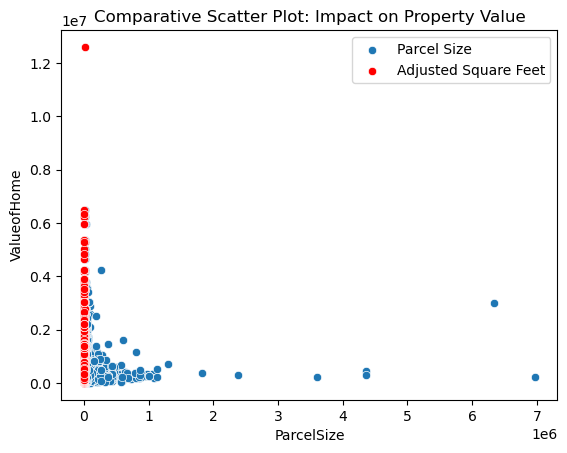

In [34]:

# Correlation matrix for ParcelSize, AdjSquareFeet, and ValueofHome
print(new_df[['ParcelSize', 'AdjSquareFeet', 'ValueofHome']].corr())

# Scatter plot to visualize the relationship
sns.scatterplot(data=new_df, x='ParcelSize', y='ValueofHome', label='Parcel Size')
sns.scatterplot(data=new_df, x='AdjSquareFeet', y='ValueofHome', color='red', label='Adjusted Square Feet')
plt.legend()
plt.title('Comparative Scatter Plot: Impact on Property Value')
plt.show()


### Correlation Analysis Interpretation:

ParcelSize vs. ValueofHome: The correlation coefficient of approximately 0.066 indicates a very weak linear relationship between the size of the parcel and the value of the home. This suggests that the overall land size has little direct impact on the property value in your dataset.

AdjSquareFeet vs. ValueofHome: A correlation coefficient of approximately 0.537 suggests a moderate positive linear relationship. This indicates that the interior square footage (adjusted square feet) has a more significant impact on the property value.

ParcelSize vs. AdjSquareFeet: The correlation of about 0.107 suggests that there is very little linear relationship between the size of the parcel and the adjusted square footage of the buildings on it.

In [35]:
# Dropping 'ParcelSize' from the DataFrame
new_df = new_df.drop('ParcelSize', axis=1)

# Print the updated DataFrame columns to confirm the change
print("Updated DataFrame columns:", new_df.columns.tolist())
print("DataFrame shape:", new_df.shape)


Updated DataFrame columns: ['AdjSquareFeet', 'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment', 'LocationWindSpeed', 'Terrain', 'ValueofHome', 'NumberOfBuildings', 'NumberOfUnits', 'Age']
DataFrame shape: (81747, 10)


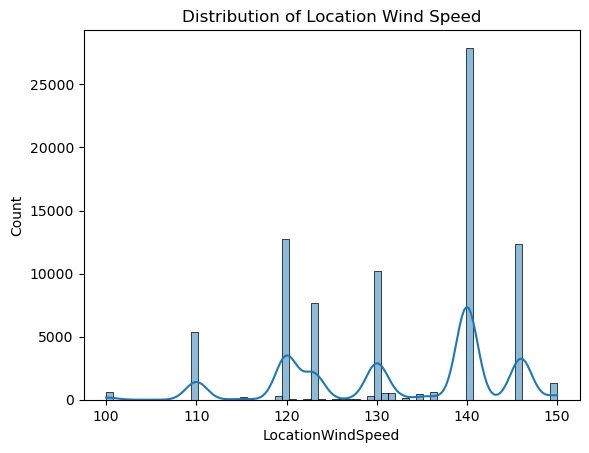

In [36]:
# Plotting distribution of LocationWindSpeed to see variance and relevance
sns.histplot(new_df['LocationWindSpeed'], kde=True)
plt.title('Distribution of Location Wind Speed')
plt.show()

In [37]:
new_df.head()

,AdjSquareFeet,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,Terrain,ValueofHome,NumberOfBuildings,NumberOfUnits,Age
0,1384.0,2956.8,NaN,1.20,129.0,B,200840.0,NaN,1.0,36.0
1,1534.0,-99.0,9.56,0.98,146.0,HVHZ,164994.0,1.0,1.0,20.0
2,2612.0,-99.0,0.82,0.05,120.0,B,200346.0,1.0,1.0,19.0
3,2848.0,-99.0,0.39,1.69,120.0,B,364161.0,1.0,1.0,40.0
4,1936.0,-99.0,1.09,1.37,120.0,B,138691.0,1.0,1.0,38.0


In [38]:
# check the number of missing values before data imputation
new_df.isnull().sum()


AdjSquareFeet                104
DistancetoCoast               52
DistancetoSinkhole           243
DistancetoFireDepartment      78
LocationWindSpeed             52
Terrain                       42
ValueofHome                   11
NumberOfBuildings           4551
NumberOfUnits                129
Age                           55
dtype: int64

In [39]:

# Drop rows where 'ValueofHome' is null
new_df = new_df.dropna(subset=['ValueofHome'])

new_df['ValueofHome'].isnull().sum()


0

In [40]:
import warnings
warnings.filterwarnings("ignore")

# Automatically select numeric and categorical columns
numerical_cols = new_df.select_dtypes(include=['number']).columns
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns

# Impute missing values
# For numerical columns: using median
for col in numerical_cols:
    new_df[col].fillna(new_df[col].median(), inplace=True)

# For categorical columns: using mode
for col in categorical_cols:
    new_df[col].fillna(new_df[col].mode()[0], inplace=True)

# check the number of missing values after data imputation
new_df.isnull().sum()


AdjSquareFeet               0
DistancetoCoast             0
DistancetoSinkhole          0
DistancetoFireDepartment    0
LocationWindSpeed           0
Terrain                     0
ValueofHome                 0
NumberOfBuildings           0
NumberOfUnits               0
Age                         0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_with_target, val_with_target = train_test_split(new_df, test_size=0.2, random_state=42)

#Save the subsets to CSV files in the Data directory
train_with_target.to_csv('../Data/train_with_target.csv', index=False)
val_with_target.to_csv('../Data/val_with_target.csv', index=False)

# Verify the splits by printing the number of rows
print("Training dataset with target size:", train_with_target.shape)
print("Validation dataset with target size:", val_with_target.shape)


Training dataset with target size: (65388, 10)
Validation dataset with target size: (16348, 10)


In [69]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = new_df.drop('ValueofHome', axis=1)  # all columns except 'ValueofHome'
y = new_df['ValueofHome']               # only the 'ValueofHome' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print("Training dataset size:", X_train.shape)
print("Training labels size:", y_train.shape)

print("Testing dataset size:", X_test.shape)
print("Testing labels size:", y_test.shape)


Training dataset size: (65388, 9)
Training labels size: (65388,)
Testing dataset size: (16348, 9)
Testing labels size: (16348,)


In [ ]:
"""
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>
"""